# Nexa Wall Street Columns Raw Data, Low Resolution vs High Resolution, NData 

Here we compare how well the LDA classifier works for both low resolution and high resolution classification when we change the number of letters it can actually use.

In [1]:
import numpy as np
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import h5py

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("../")
from aux.raw_images_columns_functions import extract_column_data, extract_letters_to_columns

#### Load both high and low resolution data and the letters

In [2]:
# Load low resolution signal
signal_location_low = '../data/wall_street_data_spaces.hdf5'
with h5py.File(signal_location_low, 'r') as f:
    dset = f['signal']
    signals_low = np.empty(dset.shape, np.float)
    dset.read_direct(signals_low)

# Load high resolution signal
signal_location_high = '../data/wall_street_data_30.hdf5'
with h5py.File(signal_location_high, 'r') as f:
    dset = f['signal']
    signals_high = np.empty(dset.shape, np.float)
    dset.read_direct(signals_high)

# Load the letters
# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_spaces.npy'
letters_sequence = np.load(text_directory)

## Calculate scalability with Ndata

### Inclusive Policy

#### Main parameters

In [3]:
MaxNletters = 2500
shift = 0  # Predict within or next letter
policy = 'inclusive' # The type of the policy fo the letter covering

Nside_low = signals_low.shape[1]
max_lag_low = 5

Nside_high = signals_high.shape[1]
max_lag_high = 15

#### Extract the data

In [4]:
# Low resolution
data_low = extract_column_data(MaxNletters, Nside_low, max_lag_low, signals_low, policy=policy)
letters_low = extract_letters_to_columns(MaxNletters, Nside_low, max_lag_low, 
                                         letters_sequence, policy=policy, shift=shift)

# High resolution
data_high = extract_column_data(MaxNletters, Nside_high, max_lag_high, signals_high, policy=policy)
letters_high = extract_letters_to_columns(MaxNletters, Nside_high, max_lag_high, 
                                          letters_sequence, policy=policy, shift=shift)

In [5]:
# Now let's do classification for different number of data
print('Policy', policy)
MaxN_lowdata = letters_low.size
MaxN_high_data = letters_high.size
print('Ndata for the low resolution', MaxN_lowdata)
print('Ndata for the high resolution', MaxN_high_data)

Policy inclusive
Ndata for the low resolution 24995
Ndata for the high resolution 74985


#### Do the calculation for low resolution

In [6]:
Ndata_array = np.arange(500, 24500, 500)
score_low = []

In [7]:
for Ndata_class in Ndata_array:
    # First we get the classification for low resolution
    X = data_low[:Ndata_class, ...].reshape(Ndata_class, Nside_low * max_lag_low)
    y = letters_low[:Ndata_class, ...]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)
    clf = LDA()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100
    score_low.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


#### Do the high resolution calculations

In [8]:
Ndata_array = np.arange(500, 24500, 500)
score_high = []

In [9]:
for Ndata_class in Ndata_array:
    # First we get the classification for low resolution
    X = data_high[:Ndata_class, ...].reshape(Ndata_class, Nside_high * max_lag_high)
    y = letters_high[:Ndata_class, ...]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)
    clf = LDA()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100
    score_high.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Plot scores as a function Ndata

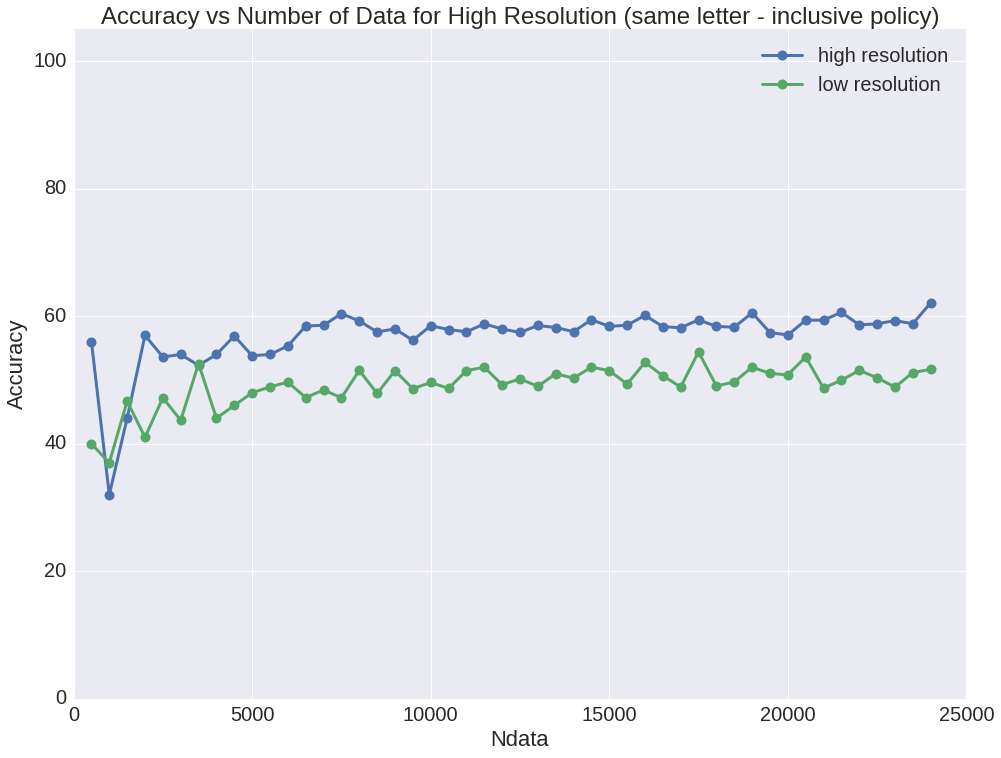

In [10]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ndata_array, score_high, 'o-', label='high resolution', lw=3, markersize=10)
ax.plot(Ndata_array, score_low, 'o-', label='low resolution', lw=3, markersize=10)
ax.legend()
ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Ndata')
ax.set_title('Accuracy vs Number of Data for High Resolution (same letter - inclusive policy)')

#### Plot them by number of letters instead

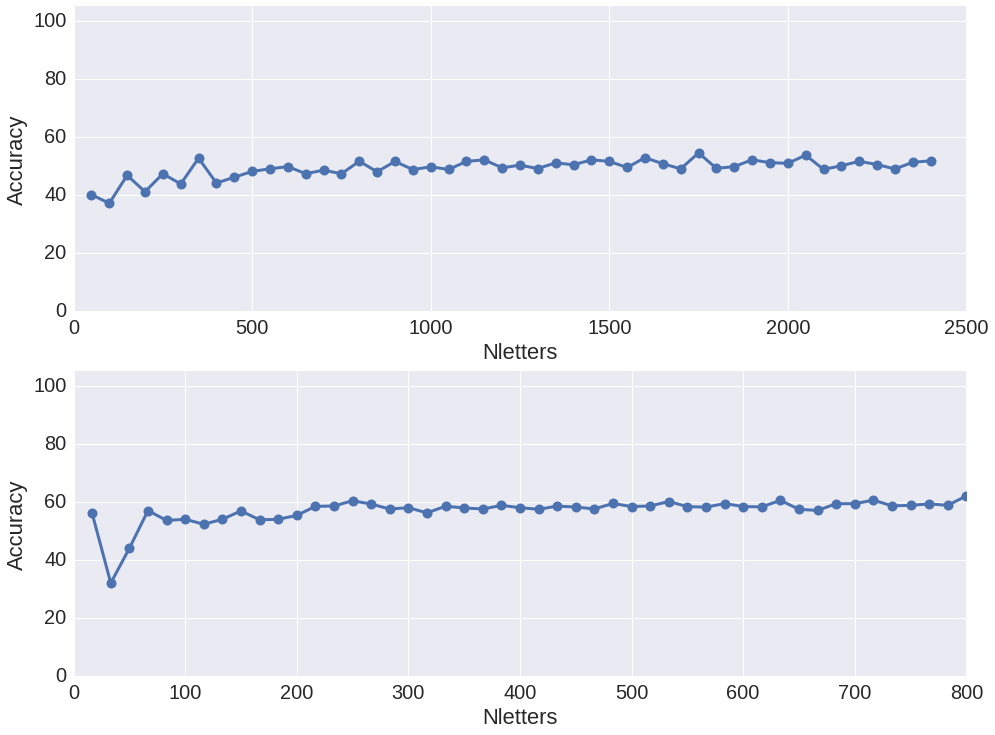

In [11]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(16, 12))

# Low resolution
ax1 = fig.add_subplot(211)
Nletters_array = Ndata_array / Nside_low
ax1.plot(Nletters_array, score_low, 'o-', lw=3, markersize=10)

ax1.set_ylim(0, 105)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Nletters')

# High resolution
ax2 = fig.add_subplot(212)
Nletters_array = Ndata_array / Nside_high
ax2.plot(Nletters_array, score_high, 'o-', lw=3, markersize=10)
ax2.set_ylim(0, 105)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Nletters')

### Exclusive Policy

#### Main parameters

In [12]:
MaxNletters = 2500
shift = 0  # Predict within or next letter
policy = 'exclusive' # The type of the policy fo the letter covering

Nside_low = signals_low.shape[1]
max_lag_low = 5

Nside_high = signals_high.shape[1]
max_lag_high = 15

#### Extract the data

In [13]:
# Low resolution
data_low = extract_column_data(MaxNletters, Nside_low, max_lag_low, signals_low, policy=policy)
letters_low = extract_letters_to_columns(MaxNletters, Nside_low, max_lag_low, 
                                         letters_sequence, policy=policy, shift=shift)

# High resolution
data_high = extract_column_data(MaxNletters, Nside_high, max_lag_high, signals_high, policy=policy)
letters_high = extract_letters_to_columns(MaxNletters, Nside_high, max_lag_high, 
                                          letters_sequence, policy=policy, shift=shift)

In [14]:
# Now let's do classification for different number of data
print('Policy', policy)
MaxN_lowdata = letters_low.size
MaxN_high_data = letters_high.size
print('Ndata for the low resolution', MaxN_lowdata)
print('Ndata for the high resolution', MaxN_high_data)


Policy exclusive
Ndata for the low resolution 15000
Ndata for the high resolution 40000


#### Do the calculation for low resolution

In [15]:
Ndata_array = np.arange(500, 24500, 500)
score_low = []

In [16]:
for Ndata_class in Ndata_array:
    # First we get the classification for low resolution
    X = data_high[:Ndata_class, ...].reshape(Ndata_class, Nside_high * max_lag_high)
    y = letters_high[:Ndata_class, ...]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)
    clf = LDA()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100
    score_low.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


#### Do the caluclation for high resoultion

In [17]:
Ndata_array = np.arange(500, 24500, 500)
score_high = []

In [18]:
for Ndata_class in Ndata_array:
    # First we get the classification for low resolution
    X = data_high[:Ndata_class, ...].reshape(Ndata_class, Nside_high * max_lag_high)
    y = letters_high[:Ndata_class, ...]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)
    clf = LDA()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test) * 100
    score_high.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Plot scores as a function of Ndata

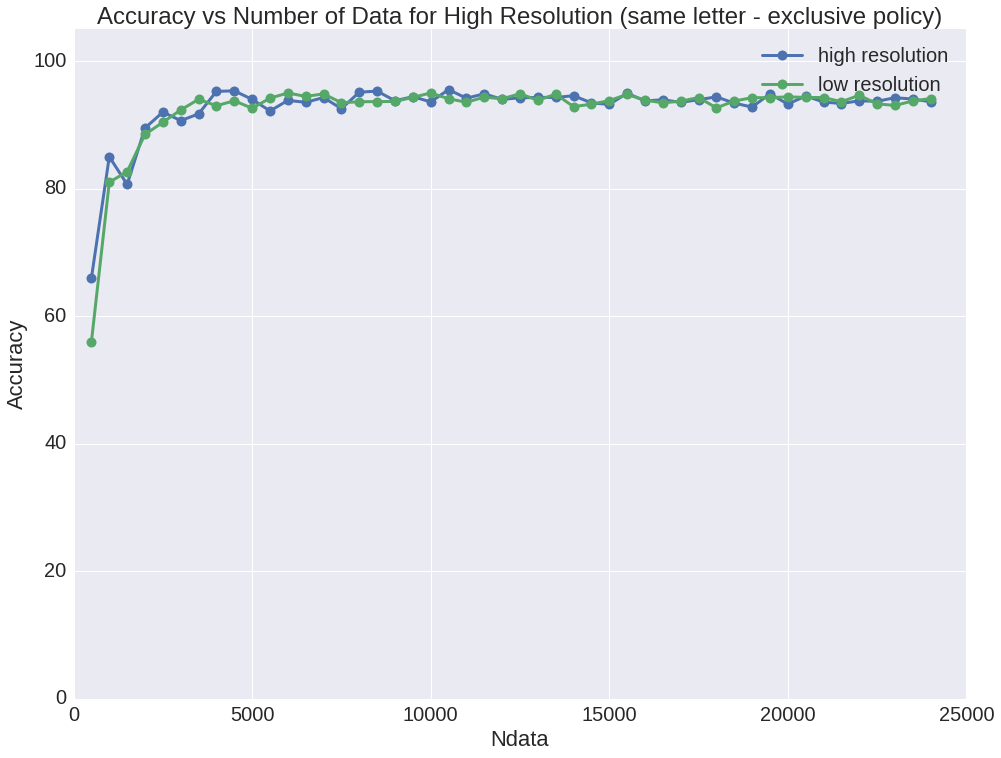

In [19]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ndata_array, score_high, 'o-', label='high resolution', lw=3, markersize=10)
ax.plot(Ndata_array, score_low, 'o-', label='low resolution', lw=3, markersize=10)
ax.legend()
ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Ndata')
ax.set_title('Accuracy vs Number of Data for High Resolution (same letter - exclusive policy)')

#### Plot scores as a function of letters

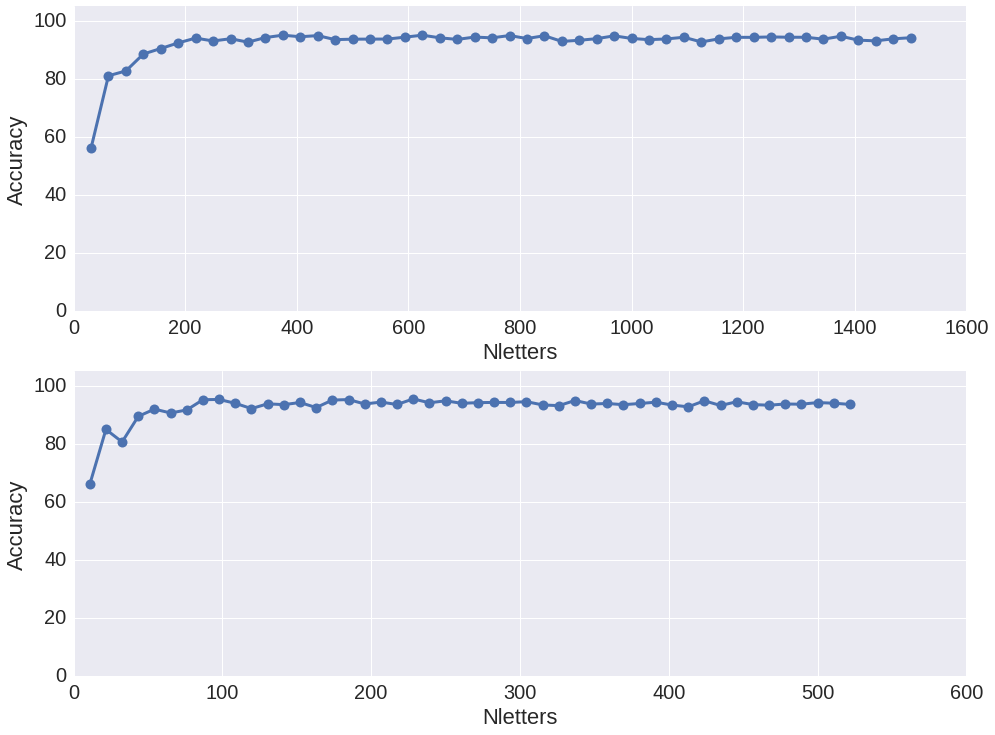

In [20]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(16, 12))

# Low resolution
ax1 = fig.add_subplot(211)
Nletters_array = Ndata_array / (Nside_low + max_lag_low + 1)
ax1.plot(Nletters_array, score_low, 'o-', lw=3, markersize=10)

ax1.set_ylim(0, 105)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Nletters')

# High resolution
ax2 = fig.add_subplot(212)
Nletters_array = Ndata_array / (Nside_high + max_lag_high + 1)
ax2.plot(Nletters_array, score_high, 'o-', lw=3, markersize=10)
ax2.set_ylim(0, 105)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Nletters')